# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = "327068e68fba9dd80ab2d47c0a48aa4f"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="

cities_df = pd.DataFrame()
cities_df["City"] = cities

weather_df = pd.DataFrame()
weather_df['City'] = ""
weather_df['Cloudiness'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""
weather_df['Humidity'] = ""
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Max Temp'] = ""
weather_df['Wind Speed'] = ""

for index, row in cities_df.iterrows():
    try:
        city_name = row["City"]
        print("Looking up information on " + city_name)
        response = requests.get(query_url + city_name).json()
        weather_df.loc[index, 'City'] = response['name']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        print("Successfully found information on " + city)
 
    except (KeyError, ValueError):
        print("ERROR: City not found. Skipping...")
        
    print("------------")

Looking up information on oudtshoorn
Successfully found information on banjar
------------
Looking up information on carnarvon
Successfully found information on banjar
------------
Looking up information on atuona
Successfully found information on banjar
------------
Looking up information on burmakino
Successfully found information on banjar
------------
Looking up information on saldanha
Successfully found information on banjar
------------
Looking up information on hofn
Successfully found information on banjar
------------
Looking up information on punta arenas
Successfully found information on banjar
------------
Looking up information on tura
Successfully found information on banjar
------------
Looking up information on mount isa
Successfully found information on banjar
------------
Looking up information on victoria
Successfully found information on banjar
------------
Looking up information on esperance
Successfully found information on banjar
------------
Looking up informatio

Successfully found information on banjar
------------
Looking up information on alice springs
Successfully found information on banjar
------------
Looking up information on saleaula
ERROR: City not found. Skipping...
------------
Looking up information on tateyama
Successfully found information on banjar
------------
Looking up information on tiksi
Successfully found information on banjar
------------
Looking up information on lamar
Successfully found information on banjar
------------
Looking up information on arraial do cabo
Successfully found information on banjar
------------
Looking up information on komsomolskiy
Successfully found information on banjar
------------
Looking up information on mopti
Successfully found information on banjar
------------
Looking up information on emilio carranza
Successfully found information on banjar
------------
Looking up information on aklavik
Successfully found information on banjar
------------
Looking up information on taolanaro
ERROR: City n

ERROR: City not found. Skipping...
------------
Looking up information on samusu
ERROR: City not found. Skipping...
------------
Looking up information on cayenne
Successfully found information on banjar
------------
Looking up information on faanui
Successfully found information on banjar
------------
Looking up information on mtwango
Successfully found information on banjar
------------
Looking up information on bathsheba
Successfully found information on banjar
------------
Looking up information on nizwa
Successfully found information on banjar
------------
Looking up information on pitimbu
Successfully found information on banjar
------------
Looking up information on bubaque
Successfully found information on banjar
------------
Looking up information on palmer
Successfully found information on banjar
------------
Looking up information on vila velha
Successfully found information on banjar
------------
Looking up information on port hedland
Successfully found information on banja

Successfully found information on banjar
------------
Looking up information on sokoto
Successfully found information on banjar
------------
Looking up information on fortuna
Successfully found information on banjar
------------
Looking up information on grand river south east
ERROR: City not found. Skipping...
------------
Looking up information on pa sang
Successfully found information on banjar
------------
Looking up information on bam
Successfully found information on banjar
------------
Looking up information on salekhard
Successfully found information on banjar
------------
Looking up information on kangaatsiaq
Successfully found information on banjar
------------
Looking up information on manakara
Successfully found information on banjar
------------
Looking up information on pimentel
Successfully found information on banjar
------------
Looking up information on solginskiy
Successfully found information on banjar
------------
Looking up information on marcona
ERROR: City not f

Successfully found information on banjar
------------
Looking up information on nyurba
Successfully found information on banjar
------------
Looking up information on boyolangu
Successfully found information on banjar
------------
Looking up information on palana
Successfully found information on banjar
------------
Looking up information on gumdag
Successfully found information on banjar
------------
Looking up information on provideniya
Successfully found information on banjar
------------
Looking up information on karkaralinsk
ERROR: City not found. Skipping...
------------
Looking up information on kargil
Successfully found information on banjar
------------
Looking up information on tunduru
ERROR: City not found. Skipping...
------------
Looking up information on tuy hoa
Successfully found information on banjar
------------
Looking up information on clyde river
Successfully found information on banjar
------------
Looking up information on miracema do tocantins
Successfully found 

Successfully found information on banjar
------------
Looking up information on karasjok
Successfully found information on banjar
------------
Looking up information on washougal
Successfully found information on banjar
------------
Looking up information on ijaki
ERROR: City not found. Skipping...
------------
Looking up information on narasapur
Successfully found information on banjar
------------
Looking up information on den helder
Successfully found information on banjar
------------
Looking up information on nouadhibou
Successfully found information on banjar
------------
Looking up information on mudyuga
ERROR: City not found. Skipping...
------------
Looking up information on presidencia roque saenz pena
Successfully found information on banjar
------------
Looking up information on wahran
ERROR: City not found. Skipping...
------------
Looking up information on te anau
Successfully found information on banjar
------------
Looking up information on ayagoz
Successfully found inf

Successfully found information on banjar
------------
Looking up information on georgiyevskoye
Successfully found information on banjar
------------
Looking up information on la asuncion
Successfully found information on banjar
------------
Looking up information on show low
Successfully found information on banjar
------------
Looking up information on buala
Successfully found information on banjar
------------
Looking up information on sao felix do xingu
Successfully found information on banjar
------------
Looking up information on praia da vitoria
Successfully found information on banjar
------------
Looking up information on yagodnoye
Successfully found information on banjar
------------
Looking up information on port-cartier
Successfully found information on banjar
------------
Looking up information on veydelevka
Successfully found information on banjar
------------
Looking up information on dingle
Successfully found information on banjar
------------
Looking up information on m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Oudtshoorn,0,ZA,1536904800,71,-33.59,22.2,55.4,6.93
1,Carnarvon,0,ZA,1536906853,67,-30.97,22.13,36.47,4.25
2,Atuona,12,PF,1536906556,100,-9.8,-139.03,79.4,17.78
3,Burmakino,0,RU,1536906854,78,57.43,40.31,56.09,7.94
4,Saldanha,0,PT,1536906854,88,41.42,-6.55,52.22,3.58
5,Hofn,100,IS,1536906559,100,64.25,-15.21,45.38,6.93
6,Punta Arenas,75,CL,1536904800,93,-53.16,-70.91,39.2,8.05
7,Tura,92,IN,1536906855,93,25.52,90.21,80.66,2.35
8,Mount Isa,0,AU,1536904800,13,-20.73,139.49,89.6,5.82
9,Victoria,90,BN,1536904800,74,5.28,115.24,87.8,4.7


In [16]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

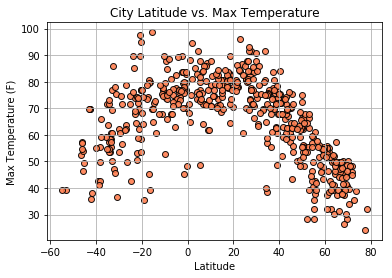

In [23]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], color="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.9,label="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Humidity Plot

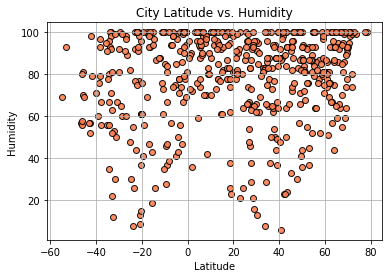

In [24]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], color="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.9,label="Cities")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

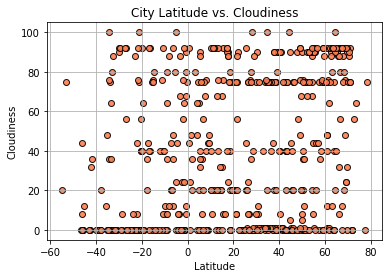

In [25]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], color="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.9,label="Cities")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

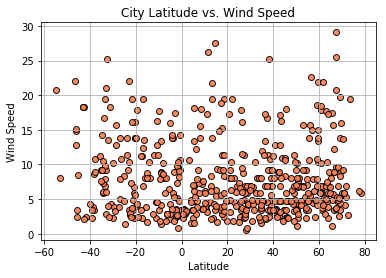

In [26]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], color="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.9,label="Cities")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()